In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con_data=pd.read_csv('./compresive_strength_concrete.csv')

In [3]:
con_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
con_data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [5]:
print(con_data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')


In [6]:
con_data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
x=(con_data.loc[:, con_data.columns !='Concrete compressive strength(MPa, megapascals)'])
y=(con_data.loc[:, con_data.columns =='Concrete compressive strength(MPa, megapascals)'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.50, random_state=42)

In [9]:
x_train.shape

(515, 8)

In [10]:
x_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
417,194.7,0.0,100.5,170.2,7.5,998.0,901.8,3
89,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3
958,259.9,100.6,78.4,170.6,10.4,935.7,762.9,28
901,144.0,170.0,133.0,192.0,8.0,814.0,805.0,28
633,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,7


In [11]:
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std
x_test-=mean
x_test/=std

In [12]:
x_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
417,-0.820076,-0.845203,0.780594,-0.617732,0.289788,0.313420,1.645220,-0.728516
89,1.439649,1.143298,-0.813912,0.158367,0.919495,-1.137696,-0.812312,-0.728516
958,-0.216990,0.284985,0.429961,-0.598084,0.797052,-0.485913,-0.115230,-0.285453
901,-1.289041,1.064656,1.296230,0.453089,0.377247,-2.047370,0.418355,-0.285453
633,-0.077318,-0.845203,-0.813912,0.011007,-1.022102,1.468154,0.456378,-0.657626


In [13]:
x_train.ndim

2

In [14]:
x_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
417,-0.820076,-0.845203,0.780594,-0.617732,0.289788,0.313420,1.645220,-0.728516
89,1.439649,1.143298,-0.813912,0.158367,0.919495,-1.137696,-0.812312,-0.728516
958,-0.216990,0.284985,0.429961,-0.598084,0.797052,-0.485913,-0.115230,-0.285453
901,-1.289041,1.064656,1.296230,0.453089,0.377247,-2.047370,0.418355,-0.285453
633,-0.077318,-0.845203,-0.813912,0.011007,-1.022102,1.468154,0.456378,-0.657626


In [15]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
417,-0.820076,-0.845203,0.780594,-0.617732,0.289788,0.313420,1.645220,-0.728516
89,1.439649,1.143298,-0.813912,0.158367,0.919495,-1.137696,-0.812312,-0.728516
958,-0.216990,0.284985,0.429961,-0.598084,0.797052,-0.485913,-0.115230,-0.285453
901,-1.289041,1.064656,1.296230,0.453089,0.377247,-2.047370,0.418355,-0.285453
633,-0.077318,-0.845203,-0.813912,0.011007,-1.022102,1.468154,0.456378,-0.657626
...,...,...,...,...,...,...,...,...
87,0.027205,1.411801,-0.813912,-1.870297,0.936987,0.398100,0.401879,-0.728516
330,-0.338162,-0.845203,1.170891,-1.939066,1.076922,1.452758,0.366391,-0.533568
466,-0.860775,-0.845203,1.172477,-0.794565,0.709592,1.352681,0.341042,0.990569
121,1.772642,0.489452,-0.813912,-0.082322,0.534674,-1.558532,0.120511,-0.285453


In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(8,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile (optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [17]:
import numpy as np

k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_con_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data= np.concatenate(
    [x_train[:i * num_val_samples],
     x_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
     y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history= model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_con_data,val_targets)
    all_scores.append(val_mae)
   

processing fold # 0
4/4 [==============================] - 0s 1ms/step - loss: 45.4025 - mae: 5.1009
processing fold # 1
4/4 [==============================] - 0s 2ms/step - loss: 43.3282 - mae: 5.0335
processing fold # 2
4/4 [==============================] - 0s 2ms/step - loss: 36.5616 - mae: 4.6878
processing fold # 3
4/4 [==============================] - 0s 5ms/step - loss: 64.2158 - mae: 6.2333


In [18]:
all_scores

[5.1008710861206055, 5.033474922180176, 4.687792778015137, 6.2333245277404785]

In [19]:
np.mean(all_scores)

5.263865828514099

In [20]:
history.history

{'loss': [1215.7606201171875,
  588.3666381835938,
  282.66729736328125,
  184.0762939453125,
  159.66163635253906,
  148.59060668945312,
  141.8176727294922,
  138.6531982421875,
  135.56942749023438,
  131.89413452148438,
  130.08990478515625,
  130.72235107421875,
  127.57508850097656,
  128.25572204589844,
  122.86647033691406,
  121.50541687011719,
  120.13275909423828,
  119.38853454589844,
  116.38943481445312,
  115.36021423339844,
  115.67515563964844,
  112.91255187988281,
  109.39962768554688,
  109.30889892578125,
  108.49894714355469,
  109.33161926269531,
  107.38971710205078,
  104.4439926147461,
  102.24569702148438,
  103.21585083007812,
  102.94172668457031,
  102.22293853759766,
  103.2888412475586,
  100.7769775390625,
  98.5234603881836,
  95.82880401611328,
  95.46700286865234,
  95.870849609375,
  93.96983337402344,
  92.18978881835938,
  92.75100708007812,
  92.2070083618164,
  90.30828094482422,
  89.89287567138672,
  89.79547882080078,
  87.6918716430664,
  86

In [21]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_con_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
    x_train[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_con_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

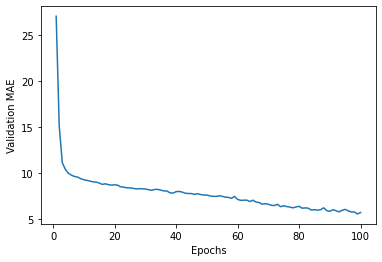

In [23]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu',
    input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [30]:
k=4
num_val_samples = len(x_train) // k
num_epochs = 80
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
    x_train[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)

    model= build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_con_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
np.mean(all_scores)

14.331395149230957

In [33]:
model.predict(x_test[0:9])


array([[50.502033],
       [36.41973 ],
       [48.585957],
       [36.037994],
       [23.517921],
       [29.48391 ],
       [23.673004],
       [34.007236],
       [24.446493]], dtype=float32)

In [34]:
y_train[0:9]

,"Concrete compressive strength(MPa, megapascals)"
417,12.18
89,39.30
958,49.77
901,29.87
633,14.20
677,7.68
11,28.02
396,41.37
557,17.24
